In [1]:
import mysql.connector as connection

In [2]:
mydb = connection.connect(host="localhost", user="root", passwd="aryan",use_pure=True)
print(mydb.is_connected())
mydb.close()

True


C:\Users\Morya\AppData\Local\Temp\ipykernel_14572\1923246406.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


  billing_country  num_of_invc
0             USA          131
1          Canada           76
2          Brazil           61
3          France           50
4         Germany           41
5  Czech Republic           30
6        Portugal           29
7  United Kingdom           28
8           India           21
9         Ireland           13


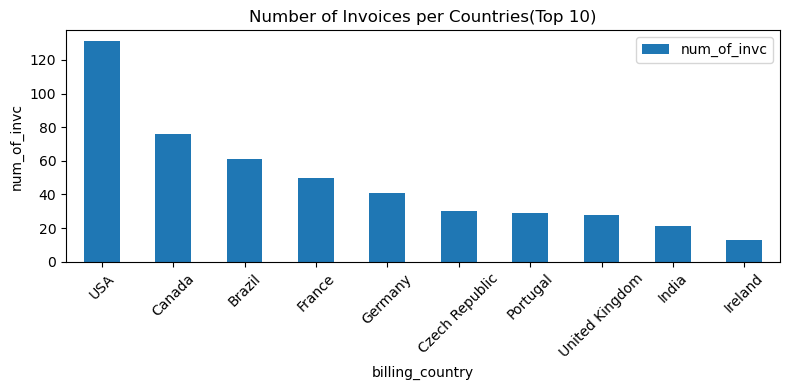

In [8]:
import pandas as pd
import mysql.connector as connection
import matplotlib.pyplot as plt

mydb = connection.connect(
    host="localhost",
    database="music_store",
    user="root",
    passwd="aryan",
    use_pure=True
)

query = """SELECT billing_country, COUNT(*) as num_of_invc 
        FROM invoice 
        GROUP BY billing_country 
        ORDER BY num_of_invc desc
        LIMIT 10;"""
df = pd.read_sql(query, mydb)
print(df)

# Plotting marks comparison
df.set_index('billing_country').plot(kind='bar', figsize=(8,4))
plt.title('Number of Invoices per Countries(Top 10)')
plt.ylabel('num_of_invc')
plt.xlabel('billing_country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mydb.close()


   grand_sum           billing_city
0     273.24                 Prague
1     169.29          Mountain View
2     166.32                 London
3     158.40                 Berlin
4     151.47                  Paris
5     129.69             SÃ£o Paulo
6     114.84                 Dublin
7     111.87                  Delhi
8     108.90  SÃ£o JosÃ© dos Campos
9     106.92              BrasÃ­lia


C:\Users\Morya\AppData\Local\Temp\ipykernel_14572\1230795816.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


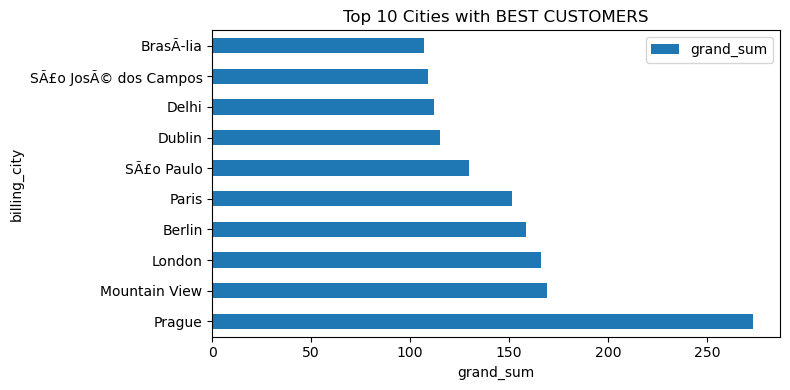

In [15]:
import pandas as pd
import mysql.connector as connection
import matplotlib.pyplot as plt

mydb = connection.connect(
    host="localhost",
    database="music_store",
    user="root",
    passwd="aryan",
    use_pure=True
)

query = """
        SELECT SUM(total) as grand_sum, billing_city
        FROM customer c
        Join invoice i on c.customer_id = i.customer_id
        GROUP BY billing_city
        ORDER BY grand_sum desc
        LIMIT 10;
        """
df = pd.read_sql(query, mydb)
print(df)

# Plotting marks comparison
df.set_index('billing_city').plot(kind='barh', figsize=(8,4))
plt.title('Top 10 Cities with BEST CUSTOMERS')
plt.ylabel('billing_city')
plt.xlabel('grand_sum')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

mydb.close()


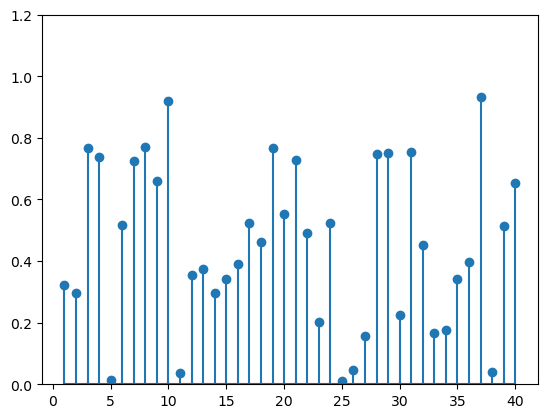

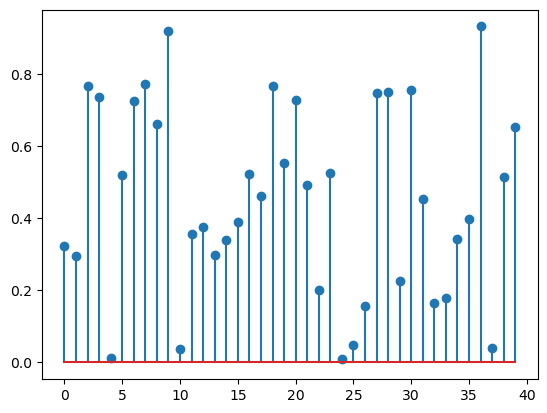

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x=range(1,41)
values=np.random.uniform(size=40)
 
# stem function
plt.stem(x, values)
plt.ylim(0, 1.2)
plt.show()
 
# stem function: If x is not provided, a sequence of numbers is created by python:
plt.stem(values)
plt.show()

C:\Users\Morya\AppData\Local\Temp\ipykernel_26312\336999289.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


                      Band_name  count_of_tracks
0                  Led Zeppelin              114
1                            U2              112
2                   Deep Purple               92
3                   Iron Maiden               81
4                     Pearl Jam               54
5                     Van Halen               52
6                         Queen               45
7            The Rolling Stones               41
8  Creedence Clearwater Revival               40
9                          Kiss               35


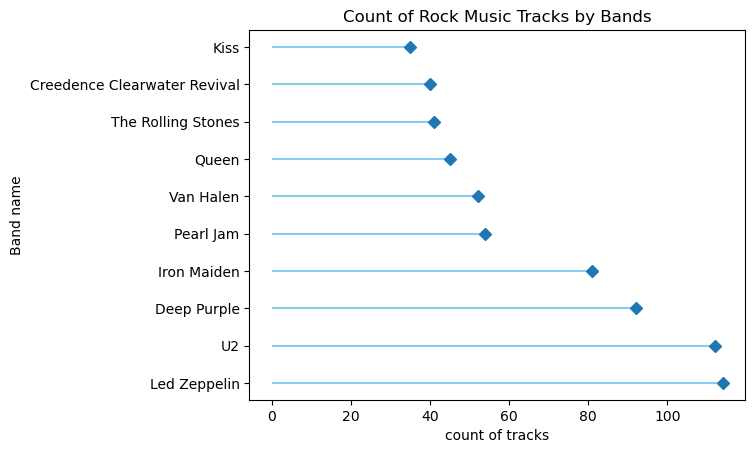

In [3]:
import pandas as pd
import mysql.connector as connection
import matplotlib.pyplot as plt

mydb = connection.connect(
    host="localhost",
    database="music_store",
    user="root",
    passwd="aryan",
    use_pure=True
)

query = """
            SELECT ar.name as Band_name , COUNT(track_id) as count_of_tracks
            FROM artist ar 
            JOIN album al ON ar.artist_id = al.artist_id
            JOIN track t ON al.album_id = t.album_id
            JOIN genre g ON t.genre_id = g.genre_id
            WHERE g.name like 'Rock'
            GROUP BY ar.name
            ORDER BY count_of_tracks desc
            LIMIT 10;
        """
df = pd.read_sql(query, mydb)
print(df)

# Plotting marks comparison
band_name = df['Band_name'] 
count_of_tracks = df['count_of_tracks']
plt.hlines(y=band_name, xmin=0, xmax=count_of_tracks, color='skyblue')
plt.plot(count_of_tracks, band_name, "D")
plt.yticks(band_name)
plt.title('Count of Rock Music Tracks by Bands')
plt.ylabel('Band name')
plt.xlabel('count of tracks')
plt.show()

# df.set_index('billing_city').plot(kind='barh', figsize=(8,4))
# plt.title('Top 10 Cities with BEST CUSTOMERS')
# plt.ylabel('billing_city')
# plt.xlabel('grand_sum')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

mydb.close()
